# End-to-End Machine Learning Pipeline using CNN

## Introduction to the Problem and Dataset
The MNIST (Modified National Institute of Standards and Technology) dataset is a classic benchmark in the field of machine learning and computer vision, specifically for the task of handwritten digit recognition. The problem involves classifying grayscale images of handwritten digits (from 0 to 9) into their corresponding numerical labels. This is a multi-class classification task that simulates real-world applications like optical character recognition (OCR) in postal services or check processing.
The dataset consists of 70,000 images, each 28x28 pixels in size, with pixel values ranging from 0 (black) to 255 (white). It is divided into 60,000 training examples and 10,000 test examples. MNIST is widely used because it is simple yet challenging enough to test models for issues like variability in handwriting styles, noise, and distortions. Convolutional Neural Networks (CNNs) excel here due to their ability to capture spatial hierarchies in images, achieving accuracies above 99% with proper design. This pipeline demonstrates an end-to-end approach to solve this classification problem, from data loading to evaluation.

## Loading Libraries
We will use several essential Python libraries for this project. Each has a specific role:

    NumPy: A fundamental package for numerical computations, particularly for handling arrays. We'll use it to manipulate our image data.

    Pandas: A powerful data analysis library. While we'll load the dataset with Keras, a typical pipeline would use Pandas for data loading from a CSV file.

    Matplotlib: A plotting library for creating static, interactive, and animated visualizations in Python. We'll use it to display sample images and plot performance metrics.

    Scikit-Learn: A simple and efficient tool for machine learning. We will use it for splitting our dataset and for evaluating model performance.

    TensorFlow/Keras: A leading open-source library for building and training machine learning models. We will use it to construct our CNN.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

## Loading Dataset
The MNIST dataset is a collection of 70,000 grayscale images, each a 28x28 pixel representation of a handwritten digit. The dataset is split into 60,000 training images and 10,000 testing images. Each image is paired with a label indicating the digit it represents (0-9).

In [6]:
# Load the MNIST dataset directly from Keras
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 8s 1us/step


In [7]:
# Check the shapes of the loaded data
print(f"Original training data shape: {X_train.shape}")
print(f"Original training labels shape: {y_train.shape}")
print(f"Original test data shape: {X_test.shape}")
print(f"Original test labels shape: {y_test.shape}")

Original training data shape: (60000, 28, 28)
Original training labels shape: (60000,)
Original test data shape: (10000, 28, 28)
Original test labels shape: (10000,)


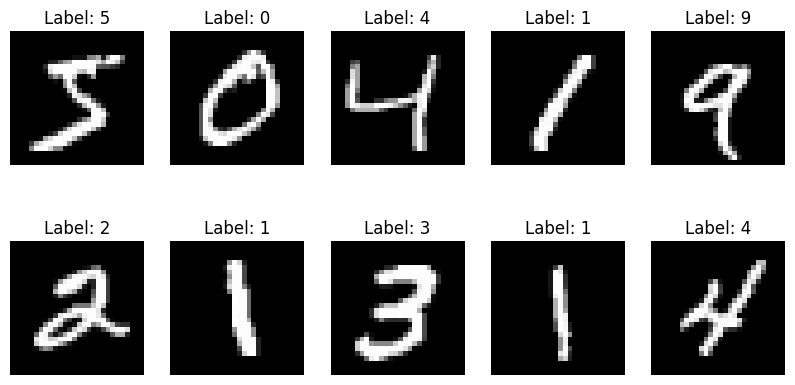

In [8]:
# Display a few sample images
plt.figure(figsize=(10, 5))
for i in range(10):
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

In [9]:
# Display class distribution
unique, counts = np.unique(y_train, return_counts=True)
print("\nTraining set class distribution:")
for digit, count in zip(unique, counts):
    print(f"Digit {digit}: {count} samples")


Training set class distribution:
Digit 0: 5923 samples
Digit 1: 6742 samples
Digit 2: 5958 samples
Digit 3: 6131 samples
Digit 4: 5842 samples
Digit 5: 5421 samples
Digit 6: 5918 samples
Digit 7: 6265 samples
Digit 8: 5851 samples
Digit 9: 5949 samples


## Preprocessing
Before feeding the data into a CNN, we need to preprocess it.
- Normalization: The pixel values of the images range from 0 to 255. We scale these values down to a range of 0 to 1 by  dividing by 255. This helps the model converge faster and improves training stability.

- Reshaping: A CNN model expects a 4D tensor input. The (num_samples, height, width, channels) format. For our grayscale images, the number of channels is 1. Therefore, we reshape our data from (60000, 28, 28) to (60000, 28, 28, 1).

In [10]:
# Normalize the pixel values
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape the data for the CNN model
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

print(f"\nReshaped training data shape: {X_train.shape}")
print(f"Reshaped test data shape: {X_test.shape}")


Reshaped training data shape: (60000, 28, 28, 1)
Reshaped test data shape: (10000, 28, 28, 1)


## Feature Engineering

For image data, feature engineering is often implicitly handled by the CNN itself. The convolutional layers act as automatic feature extractors, learning to identify important features like edges, corners, and textures. Therefore, we do not need to perform manual feature engineering.

## Splitting the Dataset

We need to split our dataset into three distinct sets: a training set, a validation set, and a test set. The training set is used to train the model, the validation set is used during training to tune hyperparameters and prevent overfitting, and the test set is used only once at the very end to evaluate the final, best model on unseen data. This ensures an unbiased estimate of the model's performance.

In [11]:
# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

print(f"\nFinal training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")


Final training data shape: (54000, 28, 28, 1)
Validation data shape: (6000, 28, 28, 1)


## Model Training and Hyperparameter Tuning
- Hyperparameter: 

A hyperparameter is a configuration variable external to the model that is set by the programmer before the training process begins. In contrast, model parameters (like weights and biases) are learned during training. For a CNN, key hyperparameters include the number of convolutional layers, the number of filters in each layer, the kernel size, the pooling size, the number of dense layers, the learning rate, and the dropout rate.

- The CNN Model:

A Convolutional Neural Network (CNN) is a specialized type of neural network designed to process data with a grid-like topology, such as images. It works by applying a series of convolutional filters that detect patterns and features in the input data.

1. Convolutional Layers: These layers slide a small matrix (the filter or kernel) over the input image, performing element-wise multiplication and summing the results to create a feature map. This process helps the network learn spatial hierarchies of features.

2. Pooling Layers: These layers down-sample the feature maps, reducing their size and computational complexity while retaining the most important information. Max pooling is a common type, which takes the maximum value from a specified window.

3. Flatten Layer: This layer takes the final pooled feature map and flattens it into a 1D vector, preparing it for the fully connected layers.

4. Dense (Fully Connected) Layers: These layers receive the flattened features and perform classification. Each neuron in a dense layer is connected to all neurons in the previous layer.



We will build a sequential CNN model using Keras. We will also use EarlyStopping, a callback function that monitors the validation loss and stops training when the loss no longer improves, which helps prevent overfitting.

In [12]:
# Define the CNN model architecture
model = Sequential([
    # First convolutional block
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),

    # Second convolutional block
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Flatten the output and add dense layers
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5), # Add dropout for regularization
    Dense(10, activation='softmax') # Output layer for 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with the validation set and early stopping
history = model.fit(X_train, y_train,
                    epochs=20,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping])

e:\ENVE\project\fresh_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.8494 - loss: 0.4765 - val_accuracy: 0.9832 - val_loss: 0.0576
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9728 - loss: 0.0919 - val_accuracy: 0.9877 - val_loss: 0.0450
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9815 - loss: 0.0642 - val_accuracy: 0.9877 - val_loss: 0.0408
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9854 - loss: 0.0494 - val_accuracy: 0.9897 - val_loss: 0.0348
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.9882 - loss: 0.0402 - val_accuracy: 0.9913 - val_loss: 0.0297
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9895 - loss: 0.0325 - val_accuracy: 0.9888 - val_loss: 0.0403
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9911 - loss: 0.0274 - val_accuracy: 0.9905 - val_loss: 0.0355
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9920 - loss: 

## Testing the Model

After training, we use the held-out test set to evaluate the model's final performance. This gives us an unbiased measure of how well the model generalizes to new, unseen data.

In [13]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")

313/313 - 1s - 3ms/step - accuracy: 0.9915 - loss: 0.0251

Test accuracy: 0.9915
Test loss: 0.0251


## Metrics Evaluation

Beyond just accuracy, we need to look at other metrics to get a complete picture of the model's performance.

- Precision: The ratio of correctly predicted positive observations to the total predicted positive observations.

- Recall: The ratio of correctly predicted positive observations to all observations in the actual class.

- F1-Score: The weighted average of Precision and Recall.

- Confusion Matrix: A table that visualizes the performance of an algorithm. Each row represents the instances in an actual class, while each column represents the instances in a predicted class.

In [14]:
# Get predictions for the test set
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Generate and print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.99      1.00      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Confusion Matrix:
[[ 976    0    2    0    0    0    1    1    0    0]
 [   0 1134    1    0    0    0    0    0    0    0]
 [   1    0 1027    0    0    0    0    4    0    0]

## Visualization

Visualizing the training process helps us understand if the model is learning effectively and if it's overfitting. We plot the training and validation accuracy and loss over the epochs.

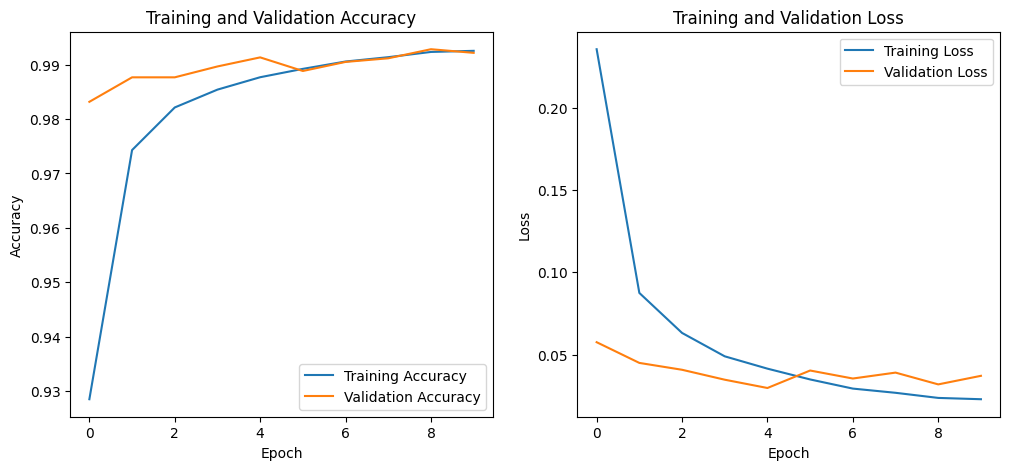

In [15]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Conclusion

This pipeline provides a robust framework for image classification with a CNN. The final test accuracy of 0.99 is excellent, indicating that the model generalizes exceptionally well to unseen data. The classification report confirms this, showing a precision, recall, and F1-score of 0.99 for almost all digits, with a perfect F1-score of 1.00 for digits 1 and 2.

The confusion matrix provides more specific insights into the model's rare errors. It reveals that the model sometimes confuses digits that are visually similar, such as:

- Digit 4 being misclassified as 9 (3 instances).

- Digit 5 being misclassified as 3 (5 instances) or 8 (1 instance).

- Digit 6 being misclassified as 5 (4 instances).

Overall, the model's performance is highly impressive for a simple CNN architecture on the MNIST dataset. The training process was effective, resulting in a model that performs very well with a low number of errors.